<a id="К_содержанию"></a>

---
## Содержание проекта
---
## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

---
## Описание данных

#### Таблица users (информация о пользователях):
* **user_id** — уникальный идентификатор пользователя
* **first_name** — имя пользователя
* **last_name** — фамилия пользователя
* **age** — возраст пользователя (годы)
* **reg_date** — дата подключения тарифа (день, месяц, год)
* **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* **city** — город проживания пользователя
* **tariff** — название тарифного плана

#### Таблица calls (информация о звонках):
* **id** — уникальный номер звонка
* **call_date** — дата звонка
* **duration** — длительность звонка в минутах
* **user_id** — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):
* **id** — уникальный номер сообщения
* **message_date** — дата сообщения
* **user_id** — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):
* **id** — уникальный номер сессии
* **mb_used** — объём потраченного за сессию интернет-трафика *(в мегабайтах)*
* **session_date** — дата интернет-сессии
* **user_id** — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):
* **tariff_name** — название тарифа
* **rub_monthly_fee** — ежемесячная абонентская плата в рублях
* **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
* **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
* **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату *(в мегабайтах)*
* **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета *(например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)*
* **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
* **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета *(1 гигабайт = 1024 мегабайта)*

### В данном проекте представленно 5 таблиц:

1. **calls** - количество телефонных звонков пользователей
2. **internet** - объем потраченого интеренет трафика
3. **messages** - количество отправленных сообщений
4. **tariffs** - варианты тарифов
5. **users** - Информация о пользователях сети

##### Необходимо провести предобработку, выделить нужные данные о пользователях. Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В таблицах 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше

##### Разделим данное исследование на несколько частей:

##### Часть 1.  [Изучение общей информации, предобработка](#Изучение_общей_информации,_предобработка)

* 1.1 Импорт нужных библиотек
* 1.2 Изучение таблиц и приведение столбцов к нужным типам данных

##### Часть 2.  [Вычисление данных о пользователях](#Вычисление_данных_о_пользователях)

* 2.1 Групировка таблиц по пользователям и месяцам
* 2.2 Заполнение пропусков
* 2.3 Приведение столбцов в нужный формат
* 2.4 Добавление в таблицу столбцов с трафиком сверх тарифа
* 2.5 Вычисление прибыли

##### Часть 3.  [Анализ данных](#Анализ_данных)

* 3.1 Составление таблицы по месяцам
* 3.2 Поведение клиентов
* 3.3 Построение гистограмм

##### Часть 4.  [Проверка гипотез](#Проверка_гипотез)

* 4.1 Проверка гипотезы о различии выручкитарифов
* 4.2 Проверка гипотезы о различии выручки в Москве и других городах

##### Часть 5.  [Общий вывод](#Общий_вывод)

<a id="Изучение_общей_информации,_предобработка"></a>
## Изучение общей информации, предобработка

Загрузим необходимые библиотеки и таблицы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
calls = pd.read_csv('/datasets/calls.csv') # Звонки
internet = pd.read_csv('/datasets/internet.csv') # Интернет
messages = pd.read_csv('/datasets/messages.csv') # Сообщения
tariffs = pd.read_csv('/datasets/tariffs.csv') # Тарыифы
users = pd.read_csv('/datasets/users.csv') #  Пользователи

##### Посмотрим таблицы, а так же проверем их на пропущенные значения и дубликаты.

### Звонки

In [2]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [4]:
calls.duplicated().sum()

0

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице присутствуют звонки с нулевой продолжительностью. Скорее всего эти значения появились ввиду пропущенных звонков или перебоев с сетью. Их стоит убрать, так как это повлияет на общее количество звонков, соответственно среднее время звонка будет ниже.

In [6]:
calls = calls.copy()

In [7]:
calls = calls.query('duration != 0')
calls

,id,call_date,duration,user_id
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


В информации указано, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Округлим их в большую сторону.

In [8]:
calls['duration'] = calls['duration'].apply(np.ceil) 

Приведем значения 'duration' и 'call_date' в нужный формат.

In [9]:
calls['duration'] = calls['duration'].astype(int)

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


### Интернет

In [12]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


В таблице присутствует лишний столбец. Нужно его убрать.

In [13]:
internet = internet.drop(['Unnamed: 0'], axis=1)

In [14]:
internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [15]:
internet.duplicated().sum()

0

Так же округлим значения мб в большую сторону. И приведем столбцы мб и даты в нужный формат.

In [16]:
internet = internet.copy()

In [17]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil) 

In [18]:
internet['mb_used'] = internet['mb_used'].astype(int)

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Посмотрим на результат.

In [20]:
internet

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,0,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


In [21]:
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id
11,1000_11,0,2018-08-28,1000
38,1000_38,0,2018-11-27,1000
46,1000_46,0,2018-06-30,1000
67,1000_67,0,2018-06-16,1000
72,1000_72,0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0,2018-12-11,1499
149381,1499_142,0,2018-11-01,1499
149383,1499_144,0,2018-11-27,1499
149386,1499_147,0,2018-10-21,1499


Так же в таблице "internet" были обнаружены нулевые значения. Скорее всего это проблемы со связью или люди пытались зайти в интернет не оплатив тариф. Стоит избавиться от этих значений.

In [22]:
internet = internet.query('mb_used != 0')

In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null int64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB


### Сообщения

In [24]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [25]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [26]:
messages.duplicated().sum()

0

In [27]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


С сообщениями все в порядке, нужно только привести столбец с датой в нужный формат.

In [28]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [29]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Тарифы

In [30]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [31]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Пользователи

In [32]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [33]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [34]:
users.duplicated().sum()

0

In [35]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [36]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Вывод
Были изучены все таблицы, проверены на пропуцски и дубликаты. Так же столбцы были приведены к нужным форматам. 

[К содержанию](#К_содержанию)
<a id="Вычисление_данных_о_пользователях"></a>
##  Вычисление данных о пользователях

##### Разобьем таблицы по месяцам для каждого пользователя, а так же посчитаем интересующие нас значения.

Посчитаем сумму и количество звонков по месяцам для каждого пользователя.

In [37]:
calls['month'] = calls['call_date'].dt.month
calls_by_month = calls.pivot_table(index=['month', 'user_id'], values='duration', aggfunc=['count','sum'])
calls_by_month

count      sum
              duration duration
month user_id                  
1     1005          11       95
      1032          44      380
      1045           1        9
      1055          47      551
      1071          18      194
...                ...      ...
12    1494          54      418
      1495         120     1031
      1496          65      518
      1497          58      545
      1499          56      492

[3168 rows x 2 columns]

Теперь посчитаем сумму сообщений для каждого пользователя за каждый месяц.

In [38]:
messages['month'] = messages['message_date'].dt.month
mess_by_month = messages.pivot_table(index=['month', 'user_id'], values='id', aggfunc='count')
mess_by_month

id
month user_id    
1     1005      7
      1032     38
      1045      5
      1055     30
      1071     16
...            ..
12    1493     78
      1495     84
      1496     51
      1497     17
      1499     66

[2717 rows x 1 columns]

Узнаем сумму трафика для каждого пользователя по месяцам.

In [39]:
internet = internet.copy()

In [40]:
internet['month'] = internet['session_date'].dt.month
internet_by_month = internet.pivot_table(index=['month', 'user_id'], values='mb_used', aggfunc='sum')
internet_by_month

mb_used
month user_id         
1     1005        2730
      1032       24147
      1045        2348
      1055       17111
      1071       15622
...                ...
12    1494       17645
      1495       23450
      1496       20757
      1497       19940
      1499       13077

[3201 rows x 1 columns]

##### Объеденим таблицы в единый датафрейм "month_df".
Для этого дадим каждому ряду свой индекс, а так же переименуем названия столбцов.

In [41]:
month_df = calls_by_month.reset_index()
month_df

,month,user_id,count,sum
,,,duration,duration
0,1,1005,11,95
1,1,1032,44,380
2,1,1045,1,9
3,1,1055,47,551
4,1,1071,18,194
...,...,...,...,...
3163,12,1494,54,418
3164,12,1495,120,1031
3165,12,1496,65,518


In [42]:
month_df.columns = ['month', 'user_id', 'calls_count', 'minutes_used']

In [43]:
month_df

,month,user_id,calls_count,minutes_used
0,1,1005,11,95
1,1,1032,44,380
2,1,1045,1,9
3,1,1055,47,551
4,1,1071,18,194
...,...,...,...,...
3163,12,1494,54,418
3164,12,1495,120,1031
3165,12,1496,65,518
3166,12,1497,58,545


In [44]:
mess_df = mess_by_month.reset_index()
mess_df

,month,user_id,id
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16
...,...,...,...
2712,12,1493,78
2713,12,1495,84
2714,12,1496,51
2715,12,1497,17


In [45]:
mess_df.columns = ['month', 'user_id', 'messages_used']

In [46]:
inter_used = internet_by_month.reset_index()
inter_used

,month,user_id,mb_used
0,1,1005,2730
1,1,1032,24147
2,1,1045,2348
3,1,1055,17111
4,1,1071,15622
...,...,...,...
3196,12,1494,17645
3197,12,1495,23450
3198,12,1496,20757
3199,12,1497,19940


In [47]:
inter_used.columns = ['month', 'user_id', 'mb_used_total']

In [48]:
month_df = month_df.merge(mess_df, how='outer')
month_df

,month,user_id,calls_count,minutes_used,messages_used
0,1,1005,11.0,95.0,7.0
1,1,1032,44.0,380.0,38.0
2,1,1045,1.0,9.0,5.0
3,1,1055,47.0,551.0,30.0
4,1,1071,18.0,194.0,16.0
...,...,...,...,...,...
3207,12,1106,NaN,NaN,24.0
3208,12,1231,NaN,NaN,191.0
3209,12,1328,NaN,NaN,7.0
3210,12,1473,NaN,NaN,20.0


In [49]:
month_df = month_df.merge(inter_used, how='outer')
month_df

,month,user_id,calls_count,minutes_used,messages_used,mb_used_total
0,1,1005,11.0,95.0,7.0,2730.0
1,1,1032,44.0,380.0,38.0,24147.0
2,1,1045,1.0,9.0,5.0,2348.0
3,1,1055,47.0,551.0,30.0,17111.0
4,1,1071,18.0,194.0,16.0,15622.0
...,...,...,...,...,...,...
3209,12,1328,NaN,NaN,7.0,39461.0
3210,12,1473,NaN,NaN,20.0,18432.0
3211,12,1489,NaN,NaN,35.0,17341.0
3212,2,1240,NaN,NaN,NaN,961.0


У нас появились пропущенные значения возможно пользователи не совершали звонки и не слали смс в определенных месяцах. Проверим это.

In [50]:
month_df.query('minutes_used == 0').sum()

month            0.0
user_id          0.0
calls_count      0.0
minutes_used     0.0
messages_used    0.0
mb_used_total    0.0
dtype: float64

In [51]:
month_df.query('messages_used == 0').sum()

month            0.0
user_id          0.0
calls_count      0.0
minutes_used     0.0
messages_used    0.0
mb_used_total    0.0
dtype: float64

In [52]:
month_df.query('mb_used_total == 0').sum()

month            0.0
user_id          0.0
calls_count      0.0
minutes_used     0.0
messages_used    0.0
mb_used_total    0.0
dtype: float64

По скольку нулевых значений практически нет, можно сделать вывод, что пользователи не использовали данные услуги связи вэтот период. Заменим пропущенные значения на 0.

In [53]:
for column in month_df[['calls_count', 'minutes_used', 'messages_used', 'mb_used_total']]:
    month_df[column] = month_df[column].fillna(value=0)

Объеденим таблицу **"month_df"** с пользователями и тарифами.

In [54]:
month_df = month_df.merge(users, how='inner')
month_df

,month,user_id,calls_count,minutes_used,messages_used,mb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1,1005,11.0,95.0,7.0,2730.0,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
1,2,1005,55.0,456.0,38.0,7394.0,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
2,3,1005,63.0,606.0,56.0,11117.0,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
3,4,1005,77.0,712.0,41.0,9365.0,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
4,5,1005,62.0,595.0,42.0,7877.0,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,11,1489,0.0,0.0,20.0,17516.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,12,1489,0.0,0.0,35.0,17341.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,10,1328,0.0,0.0,6.0,22447.0,44,NaN,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
3212,11,1328,0.0,0.0,8.0,35567.0,44,NaN,Мурманск,Рауль,Аркадьев,2018-10-16,ultra


In [55]:
month_df = month_df.merge(tariffs, left_on='tariff', right_on='tariff_name', how='outer')
month_df

,month,user_id,calls_count,minutes_used,messages_used,mb_used_total,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1,1005,11.0,95.0,7.0,2730.0,67,NaN,Набережные Челны,Афанасий,...,2018-01-25,smart,50,15360,500,550,200,3,3,smart
1,2,1005,55.0,456.0,38.0,7394.0,67,NaN,Набережные Челны,Афанасий,...,2018-01-25,smart,50,15360,500,550,200,3,3,smart
2,3,1005,63.0,606.0,56.0,11117.0,67,NaN,Набережные Челны,Афанасий,...,2018-01-25,smart,50,15360,500,550,200,3,3,smart
3,4,1005,77.0,712.0,41.0,9365.0,67,NaN,Набережные Челны,Афанасий,...,2018-01-25,smart,50,15360,500,550,200,3,3,smart
4,5,1005,62.0,595.0,42.0,7877.0,67,NaN,Набережные Челны,Афанасий,...,2018-01-25,smart,50,15360,500,550,200,3,3,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,11,1473,0.0,0.0,14.0,21692.0,18,NaN,Красноярск,Николай,...,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,ultra
3210,12,1473,0.0,0.0,20.0,18432.0,18,NaN,Красноярск,Николай,...,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,ultra
3211,10,1328,0.0,0.0,6.0,22447.0,44,NaN,Мурманск,Рауль,...,2018-10-16,ultra,1000,30720,3000,1950,150,1,1,ultra
3212,11,1328,0.0,0.0,8.0,35567.0,44,NaN,Мурманск,Рауль,...,2018-10-16,ultra,1000,30720,3000,1950,150,1,1,ultra


После объединения остались 2 столбца с тарифами. Избавимся от 1.

In [56]:
month_df = month_df.drop(columns='tariff_name')

##### Посчитаем на сколько пользователи вышли за рамки тарифов и добавим эти столбцы в таблицу.

In [57]:
def over_trafic(used, total):
    over = used - total   
    if over < 0:
        return 0
    return over

In [58]:
month_df['over_calld'] = month_df.apply(lambda row: over_trafic(row['minutes_used'], row['minutes_included']), axis=1)
month_df['over_messaged'] = month_df.apply(lambda row: over_trafic(row['messages_used'], row['messages_included']), axis=1)
month_df['over_mb_used'] = month_df.apply(lambda row: over_trafic(row['mb_used_total'], row['mb_per_month_included']), axis=1)

In [59]:
month_df

,month,user_id,calls_count,minutes_used,messages_used,mb_used_total,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_calld,over_messaged,over_mb_used
0,1,1005,11.0,95.0,7.0,2730.0,67,NaN,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,0.0,0.0,0.0
1,2,1005,55.0,456.0,38.0,7394.0,67,NaN,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,0.0,0.0,0.0
2,3,1005,63.0,606.0,56.0,11117.0,67,NaN,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,106.0,6.0,0.0
3,4,1005,77.0,712.0,41.0,9365.0,67,NaN,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,212.0,0.0,0.0
4,5,1005,62.0,595.0,42.0,7877.0,67,NaN,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,95.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,11,1473,0.0,0.0,14.0,21692.0,18,NaN,Красноярск,Николай,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3210,12,1473,0.0,0.0,20.0,18432.0,18,NaN,Красноярск,Николай,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3211,10,1328,0.0,0.0,6.0,22447.0,44,NaN,Мурманск,Рауль,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3212,11,1328,0.0,0.0,8.0,35567.0,44,NaN,Мурманск,Рауль,...,1000,30720,3000,1950,150,1,1,0.0,0.0,4847.0


Для подчсета общей прибыли преведем мб сверх тарифа в гигабайты и добавим этот столбец.

In [60]:
month_df['over_used_in_gb'] = month_df['over_mb_used']/1000
month_df['over_used_in_gb'] = month_df['over_used_in_gb'].apply(np.ceil)

Теперь посчитаем прибыль с каждого пользователя.

In [61]:
 month_df['profit'] = ((month_df['rub_per_minute'] * month_df['over_calld']) + 
                       (month_df['rub_per_message'] * month_df['over_messaged']) + 
                       (month_df['rub_per_gb'] * month_df['over_used_in_gb']) + month_df['rub_monthly_fee'])

Проверим таблицу и посмотрим пропущенные значения.

In [62]:
month_df.head(5)

,month,user_id,calls_count,minutes_used,messages_used,mb_used_total,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_calld,over_messaged,over_mb_used,over_used_in_gb,profit
0,1,1005,11.0,95.0,7.0,2730.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,0.0,0.0,0.0,0.0,550.0
1,2,1005,55.0,456.0,38.0,7394.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,0.0,0.0,0.0,0.0,550.0
2,3,1005,63.0,606.0,56.0,11117.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,106.0,6.0,0.0,0.0,886.0
3,4,1005,77.0,712.0,41.0,9365.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,212.0,0.0,0.0,0.0,1186.0
4,5,1005,62.0,595.0,42.0,7877.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,95.0,0.0,0.0,0.0,835.0


In [63]:
month_df = month_df.reset_index(drop=True)

In [64]:
month_df.isna().sum()

month                       0
user_id                     0
calls_count                 0
minutes_used                0
messages_used               0
mb_used_total               0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
over_calld                  0
over_messaged               0
over_mb_used                0
over_used_in_gb             0
profit                      0
dtype: int64

Пропуски есть только в **"churn_date"**, то есть пользователи у которых действовал тариф на момент выгрузки данных.

Теперь приведем столбцы к нужному значению.

In [65]:
name_list = ['calls_count', 'minutes_used', 'messages_used', 'over_calld', 'over_messaged',
             'over_used_in_gb', 'over_mb_used', 'profit']

for name in name_list:
    month_df[name] = month_df[name].astype(int)
month_df.head(5)

,month,user_id,calls_count,minutes_used,messages_used,mb_used_total,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_calld,over_messaged,over_mb_used,over_used_in_gb,profit
0,1,1005,11,95,7,2730.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,0,0,0,0,550
1,2,1005,55,456,38,7394.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,0,0,0,0,550
2,3,1005,63,606,56,11117.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,106,6,0,0,886
3,4,1005,77,712,41,9365.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,212,0,0,0,1186
4,5,1005,62,595,42,7877.0,67,NaN,Набережные Челны,Афанасий,...,500,550,200,3,3,95,0,0,0,835


In [66]:
namelist = ['age','first_name', 'last_name', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'churn_date', 'reg_date']

In [67]:
month_df = month_df.drop(namelist, axis=1)
month_df

,month,user_id,calls_count,minutes_used,messages_used,mb_used_total,city,tariff,over_calld,over_messaged,over_mb_used,over_used_in_gb,profit
0,1,1005,11,95,7,2730.0,Набережные Челны,smart,0,0,0,0,550
1,2,1005,55,456,38,7394.0,Набережные Челны,smart,0,0,0,0,550
2,3,1005,63,606,56,11117.0,Набережные Челны,smart,106,6,0,0,886
3,4,1005,77,712,41,9365.0,Набережные Челны,smart,212,0,0,0,1186
4,5,1005,62,595,42,7877.0,Набережные Челны,smart,95,0,0,0,835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,11,1473,0,0,14,21692.0,Красноярск,ultra,0,0,0,0,1950
3210,12,1473,0,0,20,18432.0,Красноярск,ultra,0,0,0,0,1950
3211,10,1328,0,0,6,22447.0,Мурманск,ultra,0,0,0,0,1950
3212,11,1328,0,0,8,35567.0,Мурманск,ultra,0,0,4847,5,2700


## Вывод

Данные были объединены в общую таблицу. Были заполненные пропущенные значения, а так же добавлены новые столбцы, высчитаны потраченные сообщения интернет и звонки сверх тарифов. Посчитана прибыль.

[К содержанию](#К_содержанию)
<a id="Анализ_данных"></a>
## Анализ данных 

Разделим таблицы на тарифы.

In [68]:
tarif_smart = month_df.query('tariff == "smart"')
tarif_ultra = month_df.query('tariff == "ultra"')

Теперь создадим таблицы с интересующими нас значениями.

In [69]:
pivot_smart = tarif_smart.pivot_table(index='month', 
                                      values=['minutes_used', 'messages_used', 'mb_used_total', 'profit'], aggfunc='sum')
pivot_ultra = tarif_ultra.pivot_table(index='month', 
                                      values=['minutes_used', 'messages_used', 'mb_used_total', 'profit'], aggfunc='sum')

In [70]:
pivot_smart

,mb_used_total,messages_used,minutes_used,profit
month,,,,
1,289831.0,620,6931,24725
2,673461.0,1397,17324,48201
3,1164537.0,2453,30034,90676
4,1509702.0,3443,41119,108666
5,2231353.0,4762,54618,171449
6,2593622.0,5478,64885,200059
7,3168466.0,6784,82079,250014
8,3908561.0,7905,99045,314340
9,4244377.0,8746,111439,329386


In [71]:
pivot_ultra

,mb_used_total,messages_used,minutes_used,profit
month,,,,
1,118382.0,304,3853,17550
2,282887.0,527,7131,47400
3,649423.0,1195,18117,74550
4,926409.0,1736,25191,110100
5,1298540.0,2536,34192,138300
6,1591148.0,3505,40295,171450
7,1866833.0,4536,49667,193500
8,2096565.0,5183,54653,223200
9,2210554.0,6013,62036,232950


Рассчитаем **среднее значение, медиану, дисперсию и стандартное отклонение** для каждого из тарифов.

In [72]:
for item in tarif_smart[['minutes_used', 'messages_used', 'mb_used_total']]:
    print('Среднее значение: {:.0f}'.format(tarif_smart[item].mean()), item)
    print('Медианное значение: {:.0f}'.format(tarif_smart[item].median()), item)
    print('Дисперсия: {:.0f}'.format(np.var(tarif_smart[item])), item)
    print('Стандартное отклонение: {:.0f}'.format(np.std(tarif_smart[item])), item)
    print('\n')

Среднее значение: 418 minutes_used
Медианное значение: 422 minutes_used
Дисперсия: 36203 minutes_used
Стандартное отклонение: 190 minutes_used


Среднее значение: 33 messages_used
Медианное значение: 28 messages_used
Дисперсия: 796 messages_used
Стандартное отклонение: 28 messages_used


Среднее значение: 16229 mb_used_total
Медианное значение: 16531 mb_used_total
Дисперсия: 34530413 mb_used_total
Стандартное отклонение: 5876 mb_used_total




In [73]:
for item in tarif_ultra[['minutes_used', 'messages_used', 'mb_used_total']]:
    print('Среднее значение: {:.0f}'.format(tarif_ultra[item].mean()), item)
    print('Медианное значение: {:.0f}'.format(tarif_ultra[item].median()), item)
    print('Дисперсия: {:.0f}'.format(np.var(tarif_ultra[item])), item)
    print('Стандартное отклонение: {:.0f}'.format(np.std(tarif_ultra[item])), item)
    print('\n')

Среднее значение: 527 minutes_used
Медианное значение: 518 minutes_used
Дисперсия: 100771 minutes_used
Стандартное отклонение: 317 minutes_used


Среднее значение: 49 messages_used
Медианное значение: 38 messages_used
Дисперсия: 2283 messages_used
Стандартное отклонение: 48 messages_used


Среднее значение: 19487 mb_used_total
Медианное значение: 19324 mb_used_total
Дисперсия: 101832133 mb_used_total
Стандартное отклонение: 10091 mb_used_total




In [74]:
def hists(col,x_lab,title,rang):
    tarif_smart[col].hist(bins=50, figsize=(11,5), range=(rang),alpha=0.7)
    tarif_ultra[col].hist(bins=50, figsize=(11,5), range=(rang),alpha=0.7)
    plt.xlabel(x_lab, fontsize=10)
    plt.ylabel("Частота", fontsize=10)
    plt.title(title)
    plt.legend(labels=('Тариф "Смарт"', 'Тариф "Ультра"'))

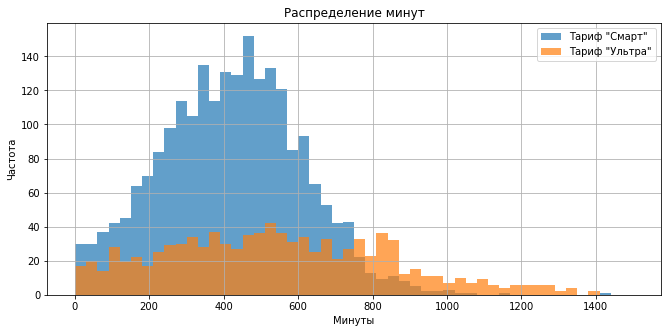

In [75]:
hists('minutes_used', "Минуты", "Распределение минут", (1,1500))

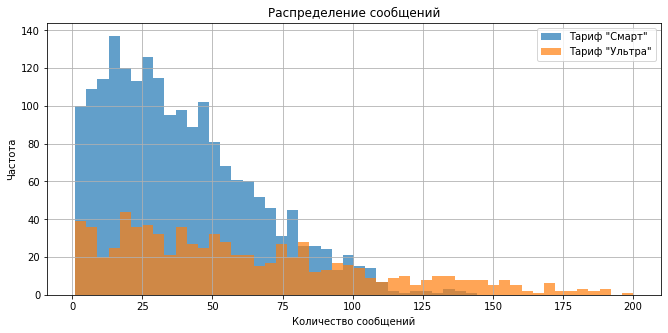

In [76]:
hists('messages_used', "Количество сообщений", "Распределение сообщений", (1,200))

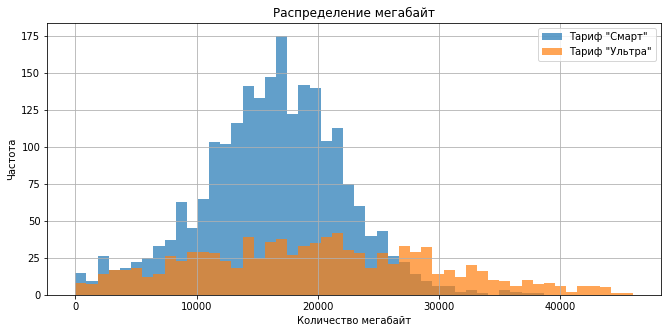

In [77]:
hists('mb_used_total', "Количество мегабайт", "Распределение мегабайт", (1,46000))

## Вывод

Из графиков видно, что пользователи тарифа *"Ультра"* больше используют телефон, чем пользователи тароифа *"Смарт"*. В среднем пользователи тарифа *"Смарт"* **проговаривают 418 минут, отправляют 33 сообщения и тратят 16229мб трафика**. В то же время пользователи тарифа *"Ультра"* **проговаривают 527 минут, отправляют 49 сообщения и тратят 19487мб трафика**.

###### Проверим какие пользователи больше выходят за рамки тарифов.

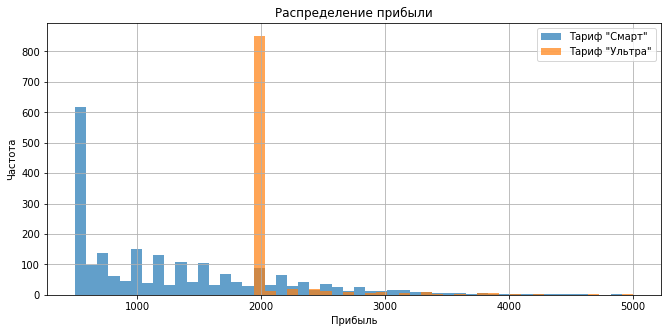

In [78]:
hists('profit', "Прибыль", "Распределение прибыли", (500,5000))

За границы тарифов больше выходят пользователи Смарта. Суммы некоторых клиентов привышают 3тыс рублей и более.

Почитаем годовую прибыль тарифов "Смарт" и "Ультра".

In [79]:
print('Пользователей тарифа "Смарт":',tarif_smart['user_id'].value_counts().count())
print('Пользователей тарифа "Ультра":',tarif_ultra['user_id'].value_counts().count())
print('\n')
print('Суммарная прибыль с тарифа "Смарт":',pivot_smart['profit'].sum())
print('Суммарная прибыль с тарифа "Ультра":',pivot_ultra['profit'].sum())
print('\n')
print('Примерная прибыль с пользователя тарифа "Смарт":',(pivot_smart['profit'].sum()/
                                                          tarif_smart['user_id'].value_counts().count()).round())
print('Примерная прибыль с пользователя тарифа "Ультра":',(pivot_ultra['profit'].sum()/
                                                           tarif_ultra['user_id'].value_counts().count()).round())

Пользователей тарифа "Смарт": 350
Пользователей тарифа "Ультра": 148


Суммарная прибыль с тарифа "Смарт": 2909751
Суммарная прибыль с тарифа "Ультра": 2041950


Примерная прибыль с пользователя тарифа "Смарт": 8314.0
Примерная прибыль с пользователя тарифа "Ультра": 13797.0


## Вывод

За рамки тарифа больше выходят пользователи тарифа "Смарт", так же пользователей этого тарифа больше приносят общей прибыли, ввиду большей аудитории, но примерная прибыль с клиента тарифа "Ультра" гораздо выше.

[К содержанию](#К_содержанию)
<a id="Проверка_гипотез"></a>
## Проверка гипотез
* 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
* 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Возьмем прибыль тарифов смарт и ультра, а так же среднюю прибль одного из тарифов.

In [80]:
profit_smart = tarif_smart['profit']
profit_ultra = tarif_ultra['profit']
mean_smart = profit_smart.mean()

#### Сформируем нулевую и альтернативную гипотезы.
* **Нулевая** Средняя выручка пользователей тарифов *«Ультра»* и *«Смарт»* не различается.
* **Альтернативная** Средняя выручка пользователей тарифов *«Ультра»* и *«Смарт»* различается.

In [81]:
alpha = .05

hyp1_resulr = st.ttest_ind(profit_smart, profit_ultra, equal_var=False)

print(hyp1_resulr.pvalue)

if (hyp1_resulr.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

3.63052752503124e-235
Отвергаем нулевую гипотезу


##### После проверки было выявлено, что прибыль от пользователей "Смарт" и "Ультра" отличаются.

#### Сформируем нулевую и альтернативную гипотезы.
* **Нулевая** Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
* **Альтернативная** Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [82]:
profit_moscow = month_df.query('city == "Москва"')['profit']
profit_not_moscow = month_df.query('city != "Москва"')['profit']
mean_profit_moscow = profit_moscow.mean()

In [83]:
print(np.var(profit_moscow, ddof=1))
print(np.var(profit_not_moscow, ddof=1))

573097.8117571302
671746.2340361134


In [84]:
alpha = .05

hyp2_resulr = st.ttest_ind(profit_moscow, profit_not_moscow, equal_var=False)

print(hyp2_resulr.pvalue)

if (hyp2_resulr.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5652395684605023
Не получилось отвергнуть нулевую гипотезу


##### После проверки было выявлено, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

[К содержанию](#К_содержанию)
<a id="Общий_вывод"></a>
## Общий вывод

Был проведен анализ пользователей компании «Мегалайн». Были добавлены толбцы с сообщениями, минутами и мегабайтами выходящие за границы тарифа, так же был добавлен столбец с расчетом прибыли на каждого абонента. Было вычислено среднее значение, медиана, дисперсия и стандартное отклонение для каждого из тарифов и проверены обе гипотезы.

У тарифа "Смарт" больше пользователей и они чаще выходят за рамки тарифа. Пользователи тарифа "Ультра" больше пользуются услугами компании. Общая прибыль с тарифа "Смарт" гораздо выше, но средняя прибль с человека выше у "Ультра".

Проверки гипотез показали, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается, а  Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.